In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report , accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sn

In [4]:
data = pd.read_csv(r"C:\Users\user\Downloads\glass.csv")

In [5]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
data.head(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1


In [8]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [9]:
data.duplicated().any()

True

In [10]:
data = data.drop_duplicates()

In [11]:
data.duplicated().any()

False

In [12]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [13]:
data.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


In [14]:
def norm_func(i):
    x = (i - i.min())/(i.max()-i.min())
    return(x)

In [15]:
data_norm = norm_func(data)

In [16]:
data_norm

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0,1.0
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0,1.0
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0,1.0
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0,1.0


In [17]:
data_norm['RI'].value_counts()

0.232660    3
0.455224    3
0.208516    3
0.245391    2
0.287094    2
           ..
0.223881    1
0.199298    1
0.215101    1
0.207638    1
0.235294    1
Name: RI, Length: 178, dtype: int64

In [18]:
data_norm.head(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0,0.0


In [19]:
data_norm['Ca'].value_counts()

0.241636    5
0.278810    5
0.312268    4
0.279740    4
0.294610    3
           ..
0.353160    1
0.322491    1
0.343866    1
0.247212    1
0.296468    1
Name: Ca, Length: 143, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x2c20e5e6c50>,
 'caps': [<matplotlib.lines.Line2D at 0x2c20e5e7190>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c20e5e69b0>],
 'medians': [<matplotlib.lines.Line2D at 0x2c20e5e76d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c20e5e7970>],
 'means': []}

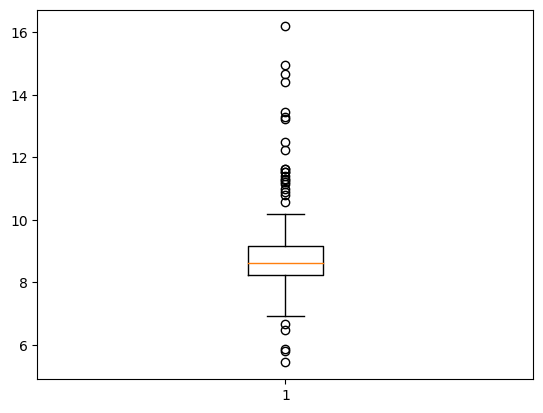

In [20]:
plt.boxplot(data['Ca'])

C:\Users\user\AppData\Local\Temp\ipykernel_5504\2996790069.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data['Ca'] , color = 'red')


<Axes: xlabel='Ca', ylabel='Density'>

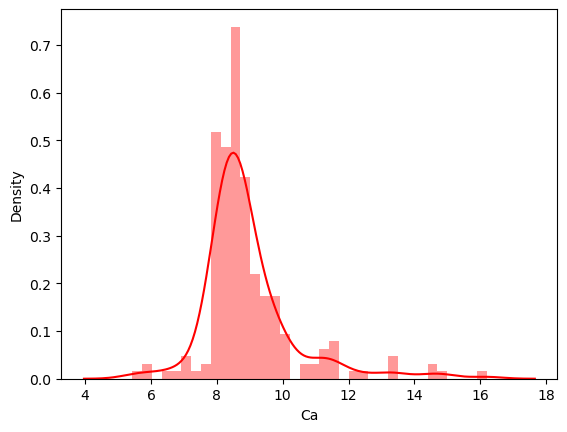

In [21]:
sn.distplot(data['Ca'] , color = 'red')

<Axes: xlabel='Ca', ylabel='Count'>

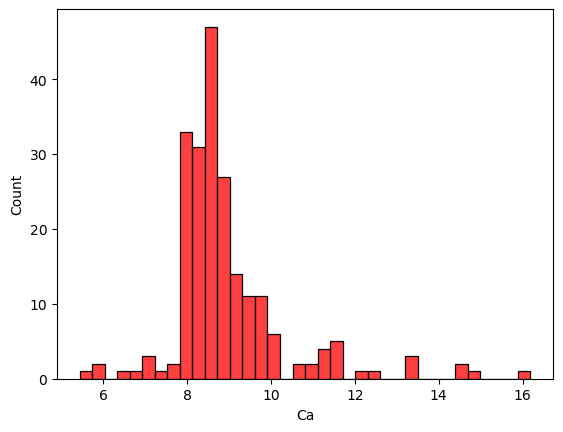

In [22]:
sn.histplot(data['Ca'] , color = 'red')

<Axes: xlabel='Na', ylabel='Mg'>

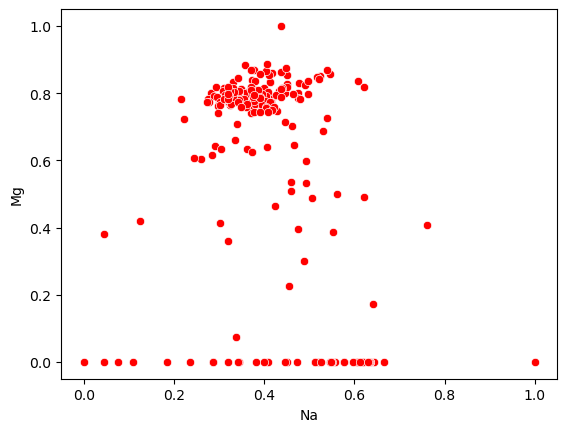

In [23]:
sn.scatterplot(x = 'Na' , y = 'Mg' , data = data_norm , color = 'red')

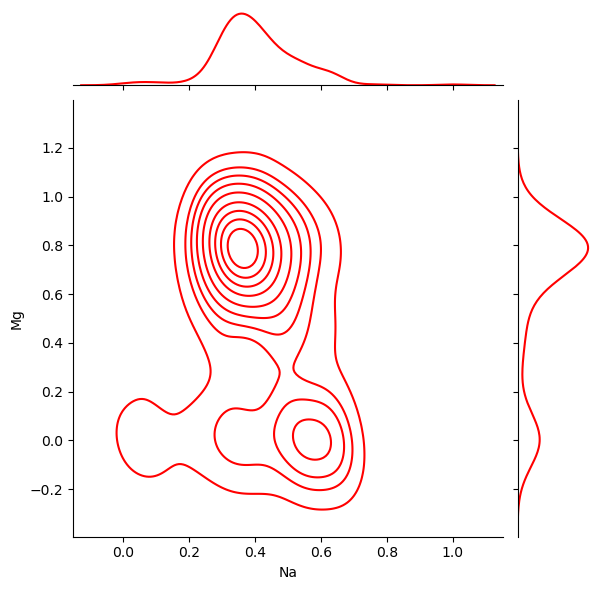

In [24]:
sn.jointplot(x = 'Na' , y = 'Mg' , data = data_norm , color = 'red' , kind = 'kde')

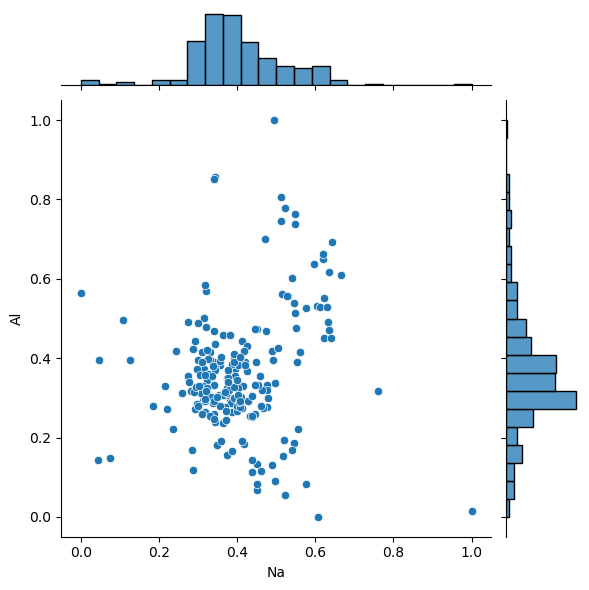

In [25]:
sn.jointplot(x = 'Na' , y = 'Al' , data = data_norm)

In [42]:
x = data.drop(['Type'] , axis =1)
y = data['Type']

In [43]:
x.head(2)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0


In [44]:
y.head(2)

0    1
1    1
Name: Type, dtype: int64

In [45]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.20 , random_state = 42)

In [46]:
x_train.shape , x_test.shape

((170, 9), (43, 9))

In [47]:
model_knn = KNeighborsClassifier(n_neighbors = 5)

In [48]:
model_knn

KNeighborsClassifier()

In [49]:
model_knn.fit(x_train , y_train)

KNeighborsClassifier()

In [50]:
y_pred = model_knn.predict(x_test)

In [51]:
y_pred

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 2, 5, 1, 2, 2, 5, 7, 1, 1, 2, 1, 7,
       7, 7, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 7, 5, 1, 1, 2, 1, 5, 1],
      dtype=int64)

In [52]:
pd.DataFrame(y_pred)

,0
0,1
1,7
2,1
3,7
4,2
5,2
6,1
7,2
8,2
9,1


In [53]:
classification_result = classification_report(y_pred , y_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
print(classification_result)

              precision    recall  f1-score   support

           1       1.00      0.53      0.69        19
           2       0.60      0.69      0.64        13
           3       0.00      0.00      0.00         0
           5       1.00      0.75      0.86         4
           6       0.00      0.00      0.00         0
           7       0.78      1.00      0.88         7

    accuracy                           0.67        43
   macro avg       0.56      0.49      0.51        43
weighted avg       0.84      0.67      0.72        43



In [56]:
accuracy_report = accuracy_score(y_pred , y_test)

In [57]:
accuracy_report

0.6744186046511628

<Axes: >

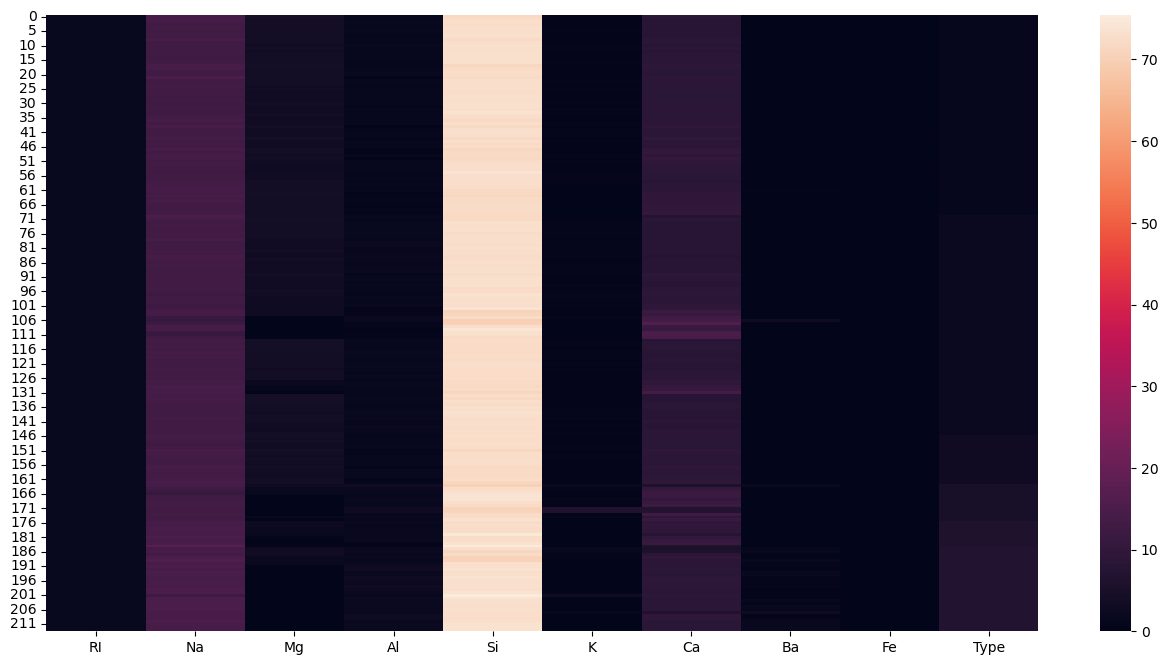

In [59]:
plt.figure(figsize = (16,8))
sn.heatmap(data)

## Hyper-parameter tuning


In [60]:
from sklearn.model_selection import GridSearchCV

In [64]:
param_grid = {'n_neighbors': [5,7,9],
             'weights': ['uniform' , 'distance'],
             'p': [1,2]}

In [65]:
gridsearch_cv = GridSearchCV(model_knn , param_grid  , cv = 5)

In [66]:
gridsearch_cv.fit(x_train , y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [67]:
y_pred_grid = gridsearch_cv.predict(x_test)

In [68]:
y_pred_grid

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 2, 7, 1, 2, 6, 5, 7, 1, 1, 2, 1, 7,
       7, 7, 1, 2, 1, 1, 6, 1, 1, 2, 3, 1, 2, 7, 5, 1, 1, 3, 1, 2, 1],
      dtype=int64)

In [69]:
accuracy_score_grid = accuracy_score(y_pred_grid , y_test)

In [70]:
accuracy_score_grid

0.6976744186046512

In [80]:
param_grid = {'n_neihgbors': [3,5,7],
              'weights': ['uniform' , 'distance'],
              'p': [1,2]}


In [83]:
grid_searchcv = GridSearchCV(model_knn , param_grid , cv = 5)

In [85]:
best_param = gridsearch_cv.best_params_

In [86]:
print(best_param)

{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}


In [87]:
best_model = gridsearch_cv.best_estimator_

In [88]:
y_pred2 = best_model.predict(x_test)

In [89]:
y_pred2

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 2, 7, 1, 2, 6, 5, 7, 1, 1, 2, 1, 7,
       7, 7, 1, 2, 1, 1, 6, 1, 1, 2, 3, 1, 2, 7, 5, 1, 1, 3, 1, 2, 1],
      dtype=int64)

In [90]:
accuracy_best_model = accuracy_score(y_pred2 , y_test)

In [91]:
accuracy_best_model

0.6976744186046512